# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

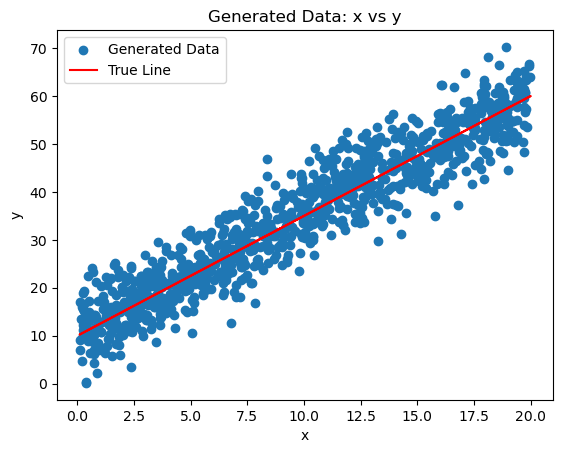

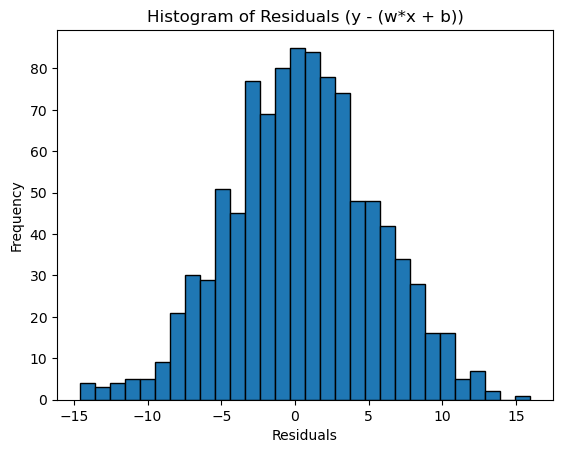

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for linear dependence
w = 2.5  # slope
b = 10   # intercept

# Generate 1000 examples
num_examples = 1000

# Generate x values
x_values = np.random.uniform(0, 20, num_examples)

# Generate normal distributed noise for y - (w*x + b)
noise = np.random.normal(0, 5, num_examples)

# Calculate y values
y_values = w * x_values + b + noise

# Plot x vs y
plt.scatter(x_values, y_values, label='Generated Data')
plt.plot(x_values, w * x_values + b, color='red', label='True Line')
plt.title('Generated Data: x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot histogram of y - (w*x + b)
residuals = y_values - (w * x_values + b)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals (y - (w*x + b))')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [2]:
import numpy as np

# Function using explicit loops
def model_loop(x, w, b):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = w * x[i] + b
    return y

# Function using NumPy, no loops
def model_np(x, w, b):
    return w * x + b

# Example to illustrate identical output
x_example = np.random.uniform(0, 10, 100)  # Random x values for example
w_example = 2.5
b_example = 5

# Compute y using both functions
y_loop = model_loop(x_example, w_example, b_example)
y_np = model_np(x_example, w_example, b_example)

# Check if the outputs are identical
outputs_identical = np.allclose(y_loop, y_np)

print("Outputs are identical:", outputs_identical)


Outputs are identical: True


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

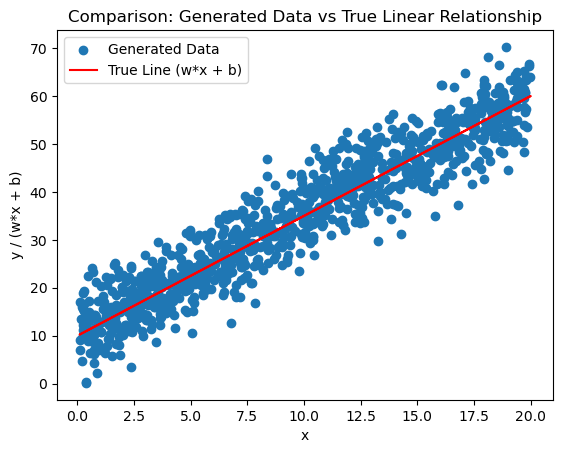

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for linear dependence
w = 2.5  # slope
b = 10   # intercept

# Generate 1000 examples
num_examples = 1000

# Generate x values
x_values = np.random.uniform(0, 20, num_examples)

# Generate normal distributed noise for y - (w*x + b)
noise = np.random.normal(0, 5, num_examples)

# Calculate y values
y_values = w * x_values + b + noise

# Plot x vs y and x vs w*x + b
plt.scatter(x_values, y_values, label='Generated Data')
plt.plot(x_values, w * x_values + b, color='red', label='True Line (w*x + b)')
plt.title('Comparison: Generated Data vs True Linear Relationship')
plt.xlabel('x')
plt.ylabel('y / (w*x + b)')
plt.legend()
plt.show()


4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


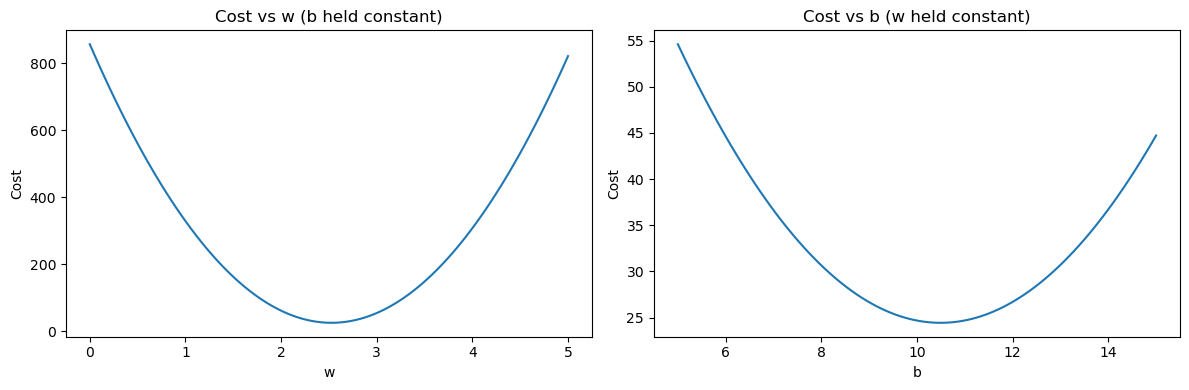

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cost(x, y, w, b):
    predictions = w * x + b
    mse = np.mean((predictions - y)**2)
    return mse

# Example usage:
# Generate data
np.random.seed(42)
x_values = np.random.uniform(0, 20, 1000)
y_values = 2.5 * x_values + 10 + np.random.normal(0, 5, 1000)

# Create a range of values for w and b
w_values = np.linspace(0, 5, 100)
b_values = np.linspace(5, 15, 100)

# Calculate the cost for each combination of w and b
costs_w = np.array([cost(x_values, y_values, w_val, 10) for w_val in w_values])
costs_b = np.array([cost(x_values, y_values, 2.5, b_val) for b_val in b_values])

# Plot cost vs w
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(w_values, costs_w)
plt.title('Cost vs w (b held constant)')
plt.xlabel('w')
plt.ylabel('Cost')

# Plot cost vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, costs_b)
plt.title('Cost vs b (w held constant)')
plt.xlabel('b')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

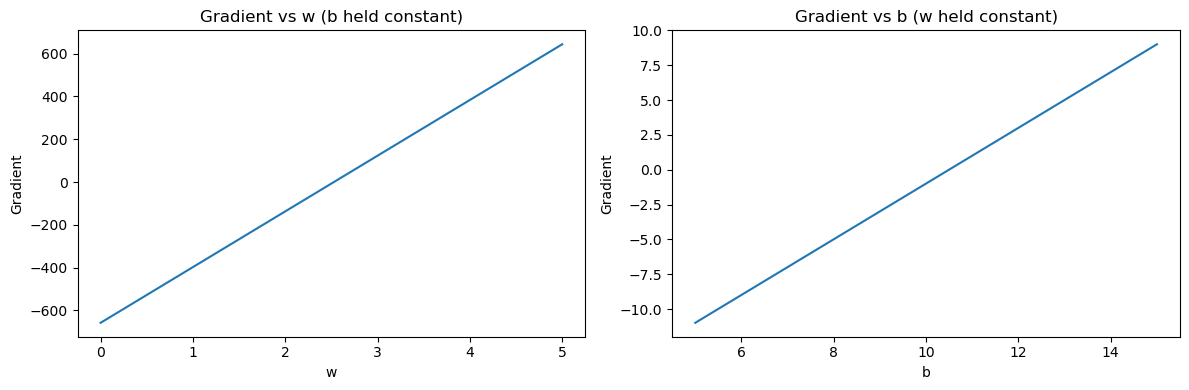

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def cost(x, y, w, b):
    predictions = w * x + b
    mse = np.mean((predictions - y)**2)
    return mse

def gradient(x, y, w, b):
    predictions = w * x + b
    dw = 2 * np.mean((predictions - y) * x)
    db = 2 * np.mean(predictions - y)
    return dw, db

# Example usage:
# Generate data
np.random.seed(42)
x_values = np.random.uniform(0, 20, 1000)
y_values = 2.5 * x_values + 10 + np.random.normal(0, 5, 1000)

# Create a range of values for w and b
w_values = np.linspace(0, 5, 100)
b_values = np.linspace(5, 15, 100)

# Calculate the gradient for each combination of w and b
grad_w = np.array([gradient(x_values, y_values, w_val, 10)[0] for w_val in w_values])
grad_b = np.array([gradient(x_values, y_values, 2.5, b_val)[1] for b_val in b_values])

# Plot gradient vs w
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(w_values, grad_w)
plt.title('Gradient vs w (b held constant)')
plt.xlabel('w')
plt.ylabel('Gradient')

# Plot gradient vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, grad_b)
plt.title('Gradient vs b (w held constant)')
plt.xlabel('b')
plt.ylabel('Gradient')

plt.tight_layout()
plt.show()


6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [1]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     b

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 3.94e+02  dj_dw: -5.743e+02, dj_db: -4.840e+01   w:  1.574e+00, b: 1.04840e+00
Iteration 5000: Cost 2.45e+01  dj_dw:  2.820e-02, dj_db: -3.739e-01   w:  2.515e+00, b: 1.01563e+01
Iteration 10000: Cost 2.44e+01  dj_dw:  2.086e-03, dj_db: -2.765e-02   w:  2.465e+00, b: 1.08208e+01
Iteration 15000: Cost 2.44e+01  dj_dw:  1.542e-04, dj_db: -2.045e-03   w:  2.462e+00, b: 1.08700e+01
Iteration 20000: Cost 2.44e+01  dj_dw:  1.141e-05, dj_db: -1.512e-04   w:  2.461e+00, b: 1.08736e+01
Iteration 25000: Cost 2.44e+01  dj_dw:  8.435e-07, dj_db: -1.118e-05   w:  2.461e+00, b: 1.08739e+01
Iteration 30000: Cost 2.44e+01  dj_dw:  6.238e-08, dj_db: -8.270e-07   w:  2.461e+00, b: 1.08739e+01
Iteration 35000: Cost 2.44e+01  dj_dw:  4.613e-09, dj_db: -6.116e-08   w:  2.461e+00, b: 1.08739e+01
Iteration 40000: Cost 2.44e+01  dj_dw:  3.411e-10, dj_db: -4.523e-09   w:  2.461e+00, b: 1.08739e+01
Iteration 45000: Cost 2.44e+01  dj_dw:  2.524e-11, dj_db: -3.345e-10   w:  2.461e+00, b: 1.08

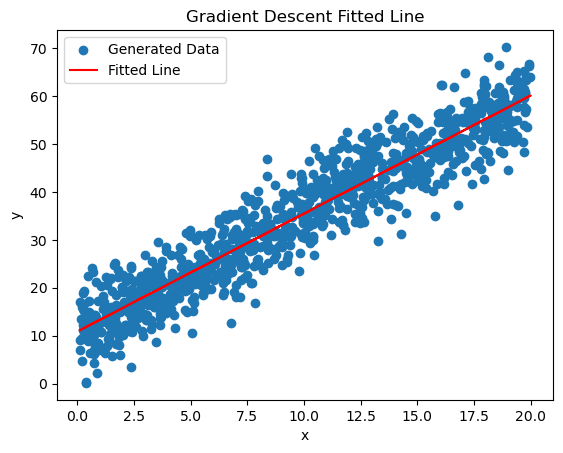

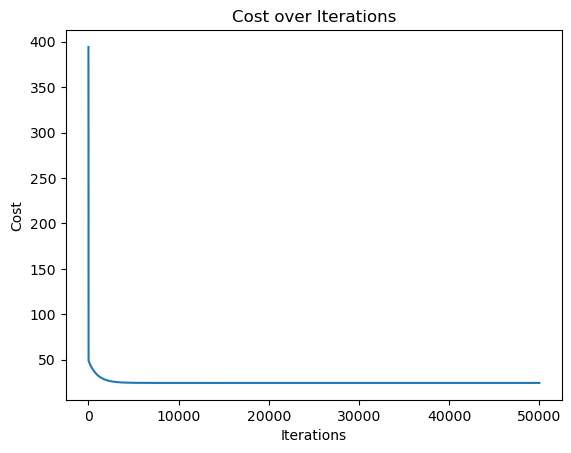

In [6]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

# Given gradient_descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i < 100000:    
            J_history.append(cost(x, y, w , b))
            p_history.append([w, b])
            
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

# Function to calculate the cost gradient
def gradient(x, y, w, b):
    predictions = w * x + b
    dw = 2 * np.mean((predictions - y) * x)
    db = 2 * np.mean(predictions - y)
    return dw, db

# Function to calculate the cost
def cost(x, y, w, b):
    predictions = w * x + b
    mse = np.mean((predictions - y)**2)
    return mse

# Generate data
np.random.seed(42)
x_values = np.random.uniform(0, 20, 1000)
y_values = 2.5 * x_values + 10 + np.random.normal(0, 5, 1000)

# Initialize parameters
w_initial = 1.0
b_initial = 1.0
alpha = 0.001
num_iters = 50000

# Run gradient descent
w_fit, b_fit, J_history, p_history = gradient_descent(x_values, y_values, w_initial, b_initial, alpha, num_iters, cost, gradient)

# Print the final values of w and b
print("\nFinal values:")
print(f"w_fit: {w_fit}, b_fit: {b_fit}")

# Plot the data and the fitted line
plt.scatter(x_values, y_values, label='Generated Data')
plt.plot(x_values, w_fit * x_values + b_fit, color='red', label='Fitted Line')
plt.title('Gradient Descent Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot the cost over iterations
plt.plot(range(len(J_history)), J_history)
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


7. Plot the cost and parameters versus iteration of gradient descent.

Iteration    0: Cost 3.94e+02  dj_dw: -5.743e+02, dj_db: -4.840e+01   w:  1.574e+00, b: 1.04840e+00
Iteration 5000: Cost 2.45e+01  dj_dw:  2.820e-02, dj_db: -3.739e-01   w:  2.515e+00, b: 1.01563e+01
Iteration 10000: Cost 2.44e+01  dj_dw:  2.086e-03, dj_db: -2.765e-02   w:  2.465e+00, b: 1.08208e+01
Iteration 15000: Cost 2.44e+01  dj_dw:  1.542e-04, dj_db: -2.045e-03   w:  2.462e+00, b: 1.08700e+01
Iteration 20000: Cost 2.44e+01  dj_dw:  1.141e-05, dj_db: -1.512e-04   w:  2.461e+00, b: 1.08736e+01
Iteration 25000: Cost 2.44e+01  dj_dw:  8.435e-07, dj_db: -1.118e-05   w:  2.461e+00, b: 1.08739e+01
Iteration 30000: Cost 2.44e+01  dj_dw:  6.238e-08, dj_db: -8.270e-07   w:  2.461e+00, b: 1.08739e+01
Iteration 35000: Cost 2.44e+01  dj_dw:  4.613e-09, dj_db: -6.116e-08   w:  2.461e+00, b: 1.08739e+01
Iteration 40000: Cost 2.44e+01  dj_dw:  3.411e-10, dj_db: -4.523e-09   w:  2.461e+00, b: 1.08739e+01
Iteration 45000: Cost 2.44e+01  dj_dw:  2.524e-11, dj_db: -3.345e-10   w:  2.461e+00, b: 1.08

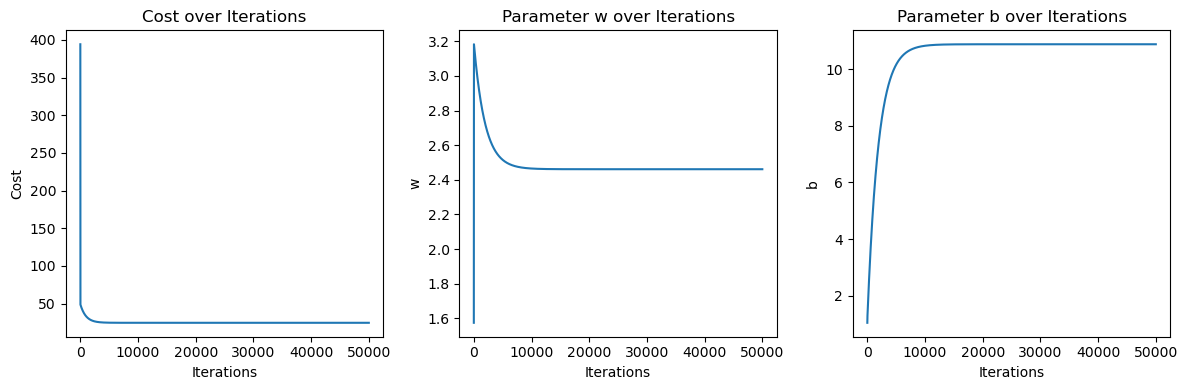

In [7]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

# Given gradient_descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i < 100000:    
            J_history.append(cost(x, y, w , b))
            p_history.append([w, b])
            
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history

# Function to calculate the cost gradient
def gradient(x, y, w, b):
    predictions = w * x + b
    dw = 2 * np.mean((predictions - y) * x)
    db = 2 * np.mean(predictions - y)
    return dw, db

# Function to calculate the cost
def cost(x, y, w, b):
    predictions = w * x + b
    mse = np.mean((predictions - y)**2)
    return mse

# Generate data
np.random.seed(42)
x_values = np.random.uniform(0, 20, 1000)
y_values = 2.5 * x_values + 10 + np.random.normal(0, 5, 1000)

# Initialize parameters
w_initial = 1.0
b_initial = 1.0
alpha = 0.001
num_iters = 50000

# Run gradient descent
w_fit, b_fit, J_history, p_history = gradient_descent(x_values, y_values, w_initial, b_initial, alpha, num_iters, cost, gradient)

# Plot the cost over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(len(J_history)), J_history)
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Plot the parameter w over iterations
plt.subplot(1, 3, 2)
p_history = np.array(p_history)
plt.plot(range(len(p_history)), p_history[:, 0])
plt.title('Parameter w over Iterations')
plt.xlabel('Iterations')
plt.ylabel('w')

# Plot the parameter b over iterations
plt.subplot(1, 3, 3)
plt.plot(range(len(p_history)), p_history[:, 1])
plt.title('Parameter b over Iterations')
plt.xlabel('Iterations')
plt.ylabel('b')

plt.tight_layout()
plt.show()
